# Generalizability: prediction performance across diverse datasets 

Here we assess the generalizability of our toolbox using open datasets across different experimental conditions, including varied imaging sites, scanner types, and visual stimuli protocols used for retinotopic mapping. 
To do so, we focus on qualitative assessment using hexbin plots and quantitative assessment with correlation scores. For each dataset, we start by vectorizing both the empirical and the predicted maps and then we filter out vertices for which the empirically devired pRF parameters have low variance explained. We then concatenate these vectors across participants, and generate hexbin plot for each topographic map. The closer the data lies along the diagonal, the closer the predicted parameters are to the empirical ones. In this notebook, you will find code to perform the following steps:
1. Data download and formatting (for all datasets available via OpenNeuro);
2. Map visualization;
3. Hexbin plots generation;
4. Performance quantification;


## Import libraries and functions

In [5]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import os
import astropy.units as u
import numpy as np
import nibabel as nib
import os.path as osp

sys.path.append('./../')

from functions.evaluation import *
from functions.datasets import *
from astropy.stats import circcorrcoef
from functions.visualization import retinotopic_map_plot
from deepRetinotopy_TheToolbox.utils.rois import ROI_WangParcelsPlusFovea as roi
from ipywidgets import interact, Dropdown

## General configurations

In [2]:
# Define dataset paths
nyu_dataset_path = '/BULK/LABDATA/openneuro_deepRetinotopy/ds003787/derivatives/freesurfer/'
stanford_dataset_path = '/BULK/LABDATA/openneuro_deepRetinotopy/ds004440/derivatives/freesurfer/'
chn_dataset_path = '/BULK/LABDATA/openneuro_deepRetinotopy/ds004698/derivatives/freesurfer/'
hcp_dataset_path = '../HCP/freesurfer/'
kiwi_dataset_path = '/BULK/LABDATA/sams_data/RetinotopyKiwi/'

# Define retinotopic maps
retinotopic_maps = ['polarAngle', 'eccentricity', 'pRFsize']

# Define datasets dictionary
datasets = {'nyu': nyu_dataset_path, 
            'stanford': stanford_dataset_path,
            'chn': chn_dataset_path,
            'hcp': hcp_dataset_path,
            'kiwi': kiwi_dataset_path}

# Config variance explained threshold
variance_explained_threshold = {'nyu': 0.1,
                                'stanford': 0.1,
                                'hcp': 10,
                                'chn': 0.1,
                                'kiwi': 0.1}

# Experiment with different datasets
experiment_datasets = {'nyu': None,
                       'stanford': None,
                       'hcp': None,
                       'chn': 'all',
                       'kiwi': 'CanHrf'}

## 1. Data download and formatting

In [ ]:
# Function for running bash script depending on the dataset need
def run_bash_script(dataset, dataset_path=None, hcp_templates_path=None, path_to_validation_repository=None):
    """
    Run a bash script based on the dataset provided.
    Args:
        dataset (str): The name of the dataset ('HCP', 'ABIDE', or 'CHN').
        dataset_path (str, optional): Path to where the dataset should be stored.
        hcp_templates_path (str, optional): Path to HCP templates.
        path_to_validation_repository (str, optional): Path to the validation.
    """
    if not os.path.exists(dataset_path):
        os.makedirs(dataset_path, exist_ok=True)
    suffix = '-d' + dataset_path + ' -t' + hcp_templates_path + ' -r' + path_to_validation_repository
    if dataset == 'nyu':
        os.system('screen -S nyu-download -dm bash ./../scripts/nyu_data.sh ' + suffix)
    elif dataset == 'stanford':
        os.system('screen -S stanford-download -dm bash ./../scripts/stanford_data.sh ' + suffix)
    elif dataset == 'chn':
        os.system('screen -S CHN-download -dm bash ./../scripts/CHN_data.sh ' + suffix)
    elif dataset == 'kiwi':
        os.system('screen -S kiwi-download -dm bash ./../scripts/newzealand_data.sh ' + suffix)
    else:
        print("Dataset not recognized. Please choose from 'nyu', 'stanford', 'chn', or 'kiwi'.") 

In [ ]:
run_bash_script('stanford', 
                dataset_path='/BULK/LABDATA/openneuro_deepRetinotopy/',
                hcp_templates_path='/home/ribeiro/Projects/deepRetinotopy_validation/templates',
                path_to_validation_repository='/home/ribeiro/Projects/deepRetinotopy_validation')

## 2. Visualizing topographic maps

In [ ]:
dataset_name = 'chn'
path_to_freesurfer = datasets[dataset_name] 
subject_id = os.listdir(path_to_freesurfer)
if 'processed' in subject_id:
    subject_id.remove('processed')
subject_id.sort()

prediction = Dropdown(options = ['empirical',
                                 'model'])
retinotopic_map = ['polarAngle', 'eccentricity', 'pRFsize']
binarize = Dropdown(options = [False, True])
hemisphere = Dropdown(options = ['lh', 'rh'])

@interact(subject_id=subject_id, prediction = prediction, 
          binarize = binarize, retinotopic_map = retinotopic_map,
          hemisphere = hemisphere)
def plot1(subject_id,prediction, binarize, retinotopic_map, hemisphere):
    return retinotopic_map_plot(subject_id, path_to_freesurfer, '../templates',
                                 prediction = prediction, binarize = binarize,
                                 retinotopic_map = retinotopic_map, 
                                 hemisphere = hemisphere, 
                                 dataset = dataset_name,
                                 experiment = experiment_datasets[dataset_name])

interactive(children=(Dropdown(description='subject_id', options=('sub-01', 'sub-02', 'sub-03', 'sub-04', 'sub…

## 3. Hexbin plots generation

Here we generate the hexbin plots shown in Figure 2 of the manuscript. To visualize and generate the plots for different datasets, you only need to change the dataset_name variable.

Region of interest: earlyvisualcortex
Threshold: 0.1
Saving plot to ../output/model_evaluation/chn/PredictedVsEmpirical_polarAngle_all_both_0.1_earlyvisualcortex_hexbin.png and ../output/model_evaluation/chn/PredictedVsEmpirical_polarAngle_all_both_0.1_earlyvisualcortex_hexbin.pdf


<Figure size 1000x1000 with 0 Axes>

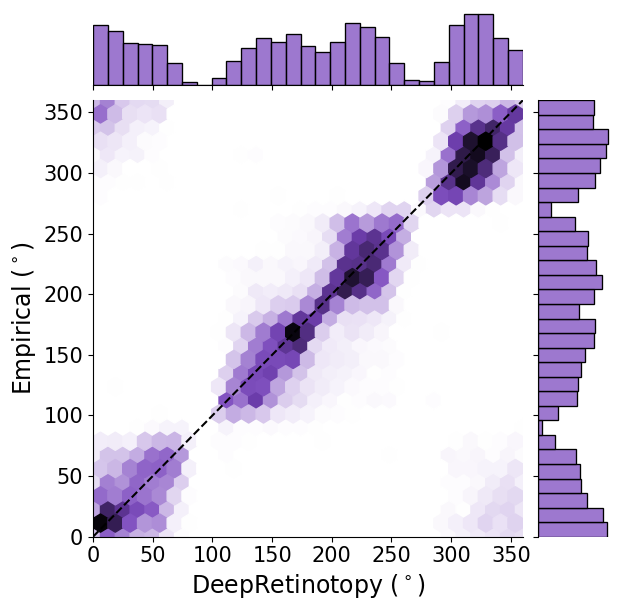

Threshold: 0.1
Saving plot to ../output/model_evaluation/chn/PredictedVsEmpirical_eccentricity_all_both_0.1_earlyvisualcortex_hexbin.png and ../output/model_evaluation/chn/PredictedVsEmpirical_eccentricity_all_both_0.1_earlyvisualcortex_hexbin.pdf


<Figure size 1000x1000 with 0 Axes>

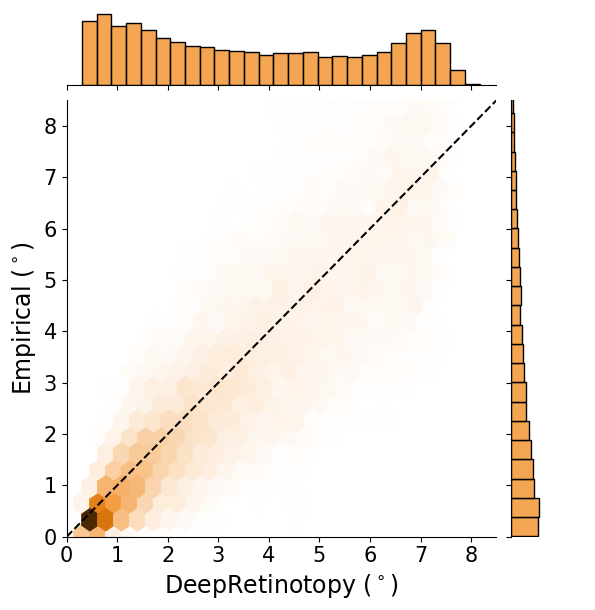

Threshold: 0.1
Saving plot to ../output/model_evaluation/chn/PredictedVsEmpirical_pRFsize_all_both_0.1_earlyvisualcortex_hexbin.png and ../output/model_evaluation/chn/PredictedVsEmpirical_pRFsize_all_both_0.1_earlyvisualcortex_hexbin.pdf


<Figure size 1000x1000 with 0 Axes>

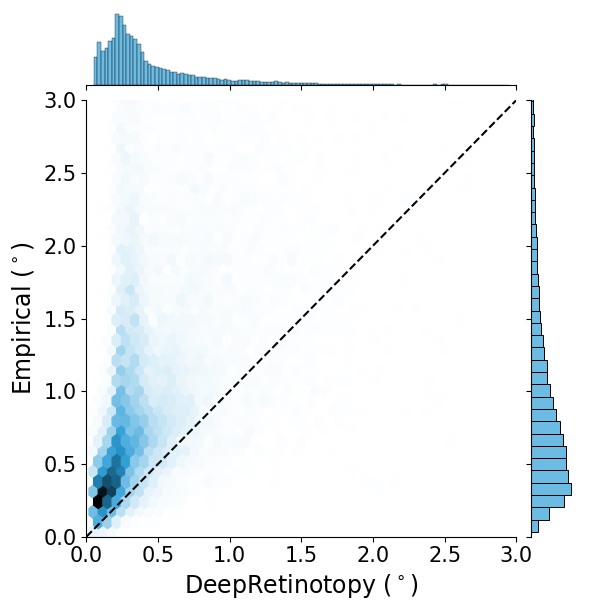

In [6]:
# Change the dataset name here:
dataset_name = 'chn'

# Configuration
path = datasets[dataset_name]
retinotopic_maps = ['polarAngle', 'eccentricity', 'pRFsize']
hemispheres='both'

# Generate hexbin plots and correlation table
threshold = variance_explained_threshold[dataset_name]
corr_scores = predicted_vs_empirical(path, dataset_name, retinotopic_maps, 
                        hemispheres = hemispheres, 
                        threshold=threshold, 
                        experiment=experiment_datasets[dataset_name],
                        region_of_interest = 'earlyvisualcortex')
base_path = f'../output/model_evaluation/{dataset_name}/'
if os.path.isdir(base_path) == False:
    os.mkdir(base_path)
corr_scores.to_csv(f'{base_path}prediction_performance_{dataset_name}.csv', index=False)

## 4. Generate data for null distributions for statistical testing

Now we can run deepRetinotopy's '2_inference.py' to generate predictions. Note that we used the GPU container on a cluster for faster inference. Therefore, the code below in merely illustrative. 

In [3]:
import numpy as np
import nibabel as nib
import os
from brainspace.null_models import SpinPermutations
import pickle

def build_hcp_null_distribution(hcp_dataset_path, n_perm=1000, hemisphere = 'lh'):
    """
    Build universal null distribution from HCP empirical retinotopic maps
    
    Parameters:
    -----------
    hcp_dataset_path : str
        Path to HCP dataset
    n_perm : int
        Number of spatial permutations per subject
    n_subjects : int or None
        Number of HCP subjects to use (None = use all available)
    
    Returns:
    --------
    dict : Universal null correlations for each map type
    """
    import scipy
    from astropy.stats import circcorrcoef
    from astropy import units as u
    
    print("Building universal null distribution from HCP data...")
    if hemisphere == 'lh':
        hemi = 'L'
    else:
        hemi = 'R'
    # Load sphere surface for permutation
    sphere_gii = nib.load(f'../templates/fs_LR-deformed_to-fsaverage.{hemi}.sphere.32k_fs_LR.surf.gii')
    sphere_coords = sphere_gii.darrays[0].data
    
    # Initialize null correlation storage
    universal_null = {
        'polarAngle': [],
        'eccentricity': [],
        'pRFsize': []
    }
    
    # Get list of HCP subjects
    hcp_subjects = ['680957', '191841', '617748', '725751', '198653',
                         '191336', '572045', '601127', '644246', '157336']
    
    print(f"Using {len(hcp_subjects)} HCP subjects to build null distribution")
    
    # Create spin permutation object
    spin = SpinPermutations(n_rep=n_perm, random_state=1234)
    spin.fit(sphere_coords)
    
    for subject_idx, subject in enumerate(hcp_subjects):
        print(f"Processing HCP subject {subject_idx+1}/{len(hcp_subjects)}: {subject}")
        
        # Load HCP empirical retinotopic maps
        try:
            empirical_polar = nib.load(f'{hcp_dataset_path}/{subject}/surf/{subject}.fs_empirical_polarAngle_{hemisphere}.func.gii')
            empirical_eccen = nib.load(f'{hcp_dataset_path}/{subject}/surf/{subject}.fs_empirical_eccentricity_{hemisphere}.func.gii')
            empirical_pRF_size = nib.load(f'{hcp_dataset_path}/{subject}/surf/{subject}.fs_empirical_pRFsize_{hemisphere}.func.gii')
            
            polar_data = empirical_polar.darrays[0].data
            eccen_data = empirical_eccen.darrays[0].data
            sigma_data = empirical_pRF_size.darrays[0].data
            
        except FileNotFoundError:
            print(f"  Skipping {subject} - retinotopic files not found")
            continue
        
        # Generate permutations
        polar_permutations = spin.randomize(polar_data)
        eccen_permutations = spin.randomize(eccen_data)
        sigma_permutations = spin.randomize(sigma_data)
        
        # For each permutation, compute "self-correlation" 
        # (this gives us the null distribution of spatial correlations)
        valid_perms = 0
        for i in range(len(polar_permutations)):
            perm_polar = polar_permutations[i]
            perm_eccen = eccen_permutations[i]
            perm_sigma = sigma_permutations[i]
            
            # Compute correlations between original and permuted (null correlation)
            polar_mask = ~(np.isnan(polar_data) | np.isnan(perm_polar))
            eccen_mask = ~(np.isnan(eccen_data) | np.isnan(perm_eccen))
            sigma_mask = ~(np.isnan(sigma_data) | np.isnan(perm_sigma))
            
            # Only keep if we have enough valid vertices
            if np.sum(polar_mask) > 100:  # At least 100 valid vertices
                polar_null_corr = circcorrcoef(polar_data[polar_mask]*u.deg, perm_polar[polar_mask]*u.deg)
                if not np.isnan(polar_null_corr):
                    universal_null['polarAngle'].append(polar_null_corr)
            
            if np.sum(eccen_mask) > 100:
                eccen_null_corr = scipy.stats.pearsonr(eccen_data[eccen_mask], perm_eccen[eccen_mask])[0]
                if not np.isnan(eccen_null_corr):
                    universal_null['eccentricity'].append(eccen_null_corr)
            
            if np.sum(sigma_mask) > 100:
                sigma_null_corr = scipy.stats.pearsonr(sigma_data[sigma_mask], perm_sigma[sigma_mask])[0]
                if not np.isnan(sigma_null_corr):
                    universal_null['pRFsize'].append(sigma_null_corr)
            
            valid_perms += 1
        
        print(f"  Added {valid_perms} null correlations from {subject}")
    
    # Summary statistics
    print("\n" + "="*60)
    print("UNIVERSAL NULL DISTRIBUTION SUMMARY")
    print("="*60)
    for map_type in ['polarAngle', 'eccentricity', 'pRFsize']:
        null_corrs = universal_null[map_type]
        print(f"{map_type}:")
        print(f"  Total null correlations: {len(null_corrs)}")
        print(f"  Mean: {np.mean(null_corrs):.4f}")
        print(f"  Std: {np.std(null_corrs):.4f}")
        print(f"  95th percentile: {np.percentile(null_corrs, 95):.4f}")
        print(f"  99th percentile: {np.percentile(null_corrs, 99):.4f}")
    
    return universal_null

def save_null_distribution(null_dist, filename='hcp_universal_null_distribution.pkl'):
    """Save the null distribution for future use"""
    with open(filename, 'wb') as f:
        pickle.dump(null_dist, f)
    print(f"Null distribution saved to {filename}")

def load_null_distribution(filename='hcp_universal_null_distribution.pkl'):
    """Load previously computed null distribution"""
    with open(filename, 'rb') as f:
        null_dist = pickle.load(f)
    return null_dist

def compare_to_hcp_null(observed_correlations, null_dist, map_type):
    """
    Compare observed correlations to HCP-derived null distribution
    
    Parameters:
    -----------
    observed_correlations : array-like
        Your observed correlations (e.g., from NYU, NSD, etc.)
    null_dist : dict
        HCP null distribution from build_hcp_null_distribution()
    map_type : str
        'polarAngle' or 'eccentricity'
    
    Returns:
    --------
    dict : Statistical results
    """
    
    null_corrs = np.array(null_dist[map_type])
    obs_corrs = np.array(observed_correlations)
    
    results = {
        'observed_correlations': obs_corrs,
        'null_correlations': null_corrs,
        'p_value': [],
        'effect_size': [],
        'null_percentile': []
    }
    
    # Compute statistics for each observed correlation
    obs_corr = np.mean(obs_corrs)
    # P-value: proportion of null correlations >= observed
    p_value = np.sum(null_corrs >= obs_corr) / len(null_corrs)
    
    # Effect size: how many standard deviations above null mean
    effect_size = (obs_corr - np.mean(null_corrs)) / np.std(null_corrs)
    
    # Percentile in null distribution
    percentile = 100 * np.sum(null_corrs <= obs_corr) / len(null_corrs)
    
    results['p_value'].append(p_value)
    results['effect_size'].append(effect_size)
    results['null_percentile'].append(percentile)

    return results

def create_publication_summary(results_dict, dataset_names, hemisphere):
    """
    Create publication-ready summary of results across datasets
    """
    import pandas as pd
    
    print("\n" + "="*80)
    print("PUBLICATION SUMMARY: COMPARISON TO HCP NULL DISTRIBUTION")
    print("="*80)
    
    # Collect data for table
    table_data = []
    
    for dataset in dataset_names:
        if dataset not in results_dict:
            continue
            
        for map_type in ['polarAngle', 'eccentricity', 'pRFsize']:
            if map_type not in results_dict[dataset]:
                continue
                
            results = results_dict[dataset][map_type]
            obs_corrs = results['observed_correlations']
            p_value = results['p_value'][0]  # Extract single value from list
            effect_size = results['effect_size'][0]
            
            # Summary statistics
            mean_corr = np.mean(obs_corrs)
            
            table_data.append({
                'dataset_name': dataset,
                'hemisphere': hemisphere,
                'map': map_type,
                'correlation_score': round(mean_corr, 4),
                'p_value': round(p_value, 4) if p_value >= 0.001 else f"{p_value:.2e}"
            })
    
    # Create and display table
    summary_table = pd.DataFrame(table_data)
    print(summary_table.to_string(index=False))
    base_path = f'../output/model_evaluation/'
    summary_table.to_csv(f'{base_path}performance_across_datasets_{hemisphere}.csv')
    
    return summary_table


In [75]:
# Step 1: Build universal null from HCP (run once)
for hemisphere in ['lh', 'rh']:
    null = build_hcp_null_distribution('/home/ribeiro/Projects/deepRetinotopy_validation/HCP/freesurfer', n_perm=1000, hemisphere=hemisphere)
    save_null_distribution(null, f'hcp_universal_null_{hemisphere}.pkl')

Building universal null distribution from HCP data...
Using 10 HCP subjects to build null distribution
Processing HCP subject 1/10: 680957
  Added 1000 null correlations from 680957
Processing HCP subject 2/10: 191841
  Added 1000 null correlations from 191841
Processing HCP subject 3/10: 617748
  Added 1000 null correlations from 617748
Processing HCP subject 4/10: 725751
  Added 1000 null correlations from 725751
Processing HCP subject 5/10: 198653
  Added 1000 null correlations from 198653
Processing HCP subject 6/10: 191336
  Added 1000 null correlations from 191336
Processing HCP subject 7/10: 572045
  Added 1000 null correlations from 572045
Processing HCP subject 8/10: 601127
  Added 1000 null correlations from 601127
Processing HCP subject 9/10: 644246
  Added 1000 null correlations from 644246
Processing HCP subject 10/10: 157336
  Added 1000 null correlations from 157336

UNIVERSAL NULL DISTRIBUTION SUMMARY
polarAngle:
  Total null correlations: 10000
  Mean: 0.0007
  Std: 0.

In [7]:
for hemisphere in ['lh', 'rh']:
    results_across_datasets = {}
    for dataset_name in ['hcp', 'nyu', 'stanford', 'chn', 'kiwi']:
        # Step 2: Load observed corraletions and null distribution
        base_path = f'../output/model_evaluation/{dataset_name}/'
        null = load_null_distribution(f'hcp_universal_null_{hemisphere}.pkl')
        corr_table = pd.read_csv(f'{base_path}prediction_performance_{dataset_name}.csv')

        # Step 3: Compare each dataset to the HCP null
        results_all = {}
        for retinotopic_map in ['polarAngle', 'eccentricity', 'pRFsize']:
            correlations = corr_table.query(f"hemisphere == '{hemisphere}' and retinotopic_map == '{retinotopic_map}'")['scores']
            correlations = list(correlations)
            results = compare_to_hcp_null(correlations, null, retinotopic_map)
            results_all[retinotopic_map] = results

        results_across_datasets[dataset_name] = {'polarAngle': results_all['polarAngle'],
                        'eccentricity': results_all['eccentricity'],
                        'pRFsize': results_all['pRFsize']}
        
    create_publication_summary(results_across_datasets, ['hcp', 'nyu', 'stanford', 'chn', 'kiwi'], hemisphere)


PUBLICATION SUMMARY: COMPARISON TO HCP NULL DISTRIBUTION
dataset_name hemisphere          map  correlation_score  p_value
         hcp         lh   polarAngle             0.8335 0.00e+00
         hcp         lh eccentricity             0.8825 0.00e+00
         hcp         lh      pRFsize             0.6807 0.00e+00
         nyu         lh   polarAngle             0.6907 0.00e+00
         nyu         lh eccentricity             0.7593 0.00e+00
         nyu         lh      pRFsize             0.6868 0.00e+00
    stanford         lh   polarAngle             0.6736 0.00e+00
    stanford         lh eccentricity             0.6898 0.00e+00
    stanford         lh      pRFsize             0.6124 0.00e+00
         chn         lh   polarAngle             0.8103 0.00e+00
         chn         lh eccentricity             0.8638 0.00e+00
         chn         lh      pRFsize             0.4855 0.00e+00
        kiwi         lh   polarAngle             0.6370 0.00e+00
        kiwi         lh eccentri

## 5. Comparing median maps across datasets

In [3]:
import os
import matplotlib.pyplot as plt 
from functions.evaluation import roi_earlyvisualcortex, create_mask

## Region of interest used for training
final_mask_L_ROI, final_mask_R_ROI, index_L_mask, index_R_mask = roi(['ROI'])
## Early visual cortex
final_mask_L, final_mask_R, index_L_mask, index_R_mask = roi_earlyvisualcortex(['ROI'])
# Final mask
ROI_masked, mask = create_mask(final_mask_L_ROI, final_mask_R_ROI, 
                               final_mask_L, final_mask_R, 'lh')
mask = mask[ROI_masked == 1]

In [ ]:
def median_maps(path_to_freesurfer, list_of_subs, dataset = 'hcp', retinotopic_map = 'pRFsize', hemisphere = 'lh'):
    retinotopic_maps = []
    variance_explained_maps = []
    for sub in list_of_subs:
        if dataset == 'chn' or dataset == 'kiwi':
            data = RetinotopyData_logbar(path_to_freesurfer, sub, hemisphere, retinotopic_map, experiment=experiment_datasets[dataset])
        else:
            data = RetinotopyData(path_to_freesurfer, sub, hemisphere, retinotopic_map)
        data.apply_mask_to_maps(ROI_masked)
        data.apply_mask_to_maps(mask)
        if retinotopic_map == 'polarAngle' and hemisphere == 'lh':
            data.apply_transform_polarangle()
        retinotopic_maps.append(data.empirical_map)
        variance_explained_maps.append(data.variance_explained)
    retinotopic_maps = np.array(retinotopic_maps)
    return np.median(retinotopic_maps, axis=0), np.median(variance_explained_maps, axis=0)

In [ ]:
def dataset_vs_dataset(dataset_1_name, dataset_2_name):
    """
    Compare two datasets by plotting their retinotopic maps.
    Args:
        dataset_1_name (str): Name of the first dataset.
        dataset_2_name (str): Name of the second dataset.
    """
    for retinotopic_map in ['polarAngle', 'eccentricity', 'pRFsize']:
        dataset_1_maps = []
        average_var_dataset1_maps = []
        dataset_2_maps = []
        average_var_dataset2_maps =[]

        for hemisphere in ['lh', 'rh']:
            dataset_1, average_var_dataset1 = median_maps(datasets[dataset_1_name], os.listdir(datasets[dataset_1_name]), 
                                                            dataset = dataset_1_name, retinotopic_map = retinotopic_map, hemisphere=hemisphere)
            dataset_2, average_var_dataset2 = median_maps(datasets[dataset_2_name], os.listdir(datasets[dataset_2_name]),
                                                                    dataset= dataset_2_name, retinotopic_map = retinotopic_map, hemisphere=hemisphere)
            if retinotopic_map == 'variance_explained':
                dataset_2 = dataset_2 / 100  # Convert to percentage
            dataset_1_maps.append(dataset_1)
            average_var_dataset1_maps.append(average_var_dataset1)
            dataset_2_maps.append(dataset_2)
            average_var_dataset2_maps.append(average_var_dataset2)
        dataset_1_maps = np.array(dataset_1_maps).reshape(-1)
        average_var_dataset1_maps = np.array(average_var_dataset1_maps).reshape(-1)
        dataset_2_maps = np.array(dataset_2_maps).reshape(-1)
        average_var_dataset2_maps = np.array(average_var_dataset2_maps).reshape(-1)
        if dataset_2_name == 'hcp':
            threshold = 15
        else:
            threshold = 0.15
        if retinotopic_map != 'variance_explained':
            plt.scatter(x=dataset_1_maps[average_var_dataset2_maps>threshold], y=dataset_2_maps[average_var_dataset2_maps>threshold], c = 'gray', marker = 'o', alpha= .3)
        else:
            plt.scatter(x=dataset_1_maps[average_var_dataset2_maps>threshold], y=dataset_2_maps[average_var_dataset2_maps>threshold],  c = 'gray', marker = 'o', alpha= .3)
        dataset_plot_name = {'hcp':'HCP', 'nyu': 'NYU', 'stanford': 'Stanford', 'chn': 'CHN', 'kiwi': 'New Zealand'}
        if retinotopic_map == 'polarAngle':
            plt.plot([0, 360], [0, 360], 'k--')
            plt.xlim([0, 360])
            plt.ylim([0, 360])
            plt.xlabel('')
            plt.ylabel('')
            # plt.xlabel('Polar angle from ' + dataset_plot_name[dataset_1_name])
            # plt.ylabel('Polar angle from ' + dataset_plot_name[dataset_2_name])
        elif retinotopic_map == 'eccentricity':
            plt.plot([0, 8], [0, 8], 'k--')
            plt.xlim([0, 8])
            plt.ylim([0, 8])
            plt.xlabel('')
            plt.ylabel('')
            # plt.xlabel('Eccentricity from ' + dataset_plot_name[dataset_1_name])
            # plt.ylabel('Eccentricity from ' + dataset_plot_name[dataset_2_name])
        elif retinotopic_map == 'pRFsize':
            plt.plot([0, 4], [0, 4], 'k--')
            plt.xlim([0, 4])
            plt.ylim([0, 4])
            plt.xlabel('')
            plt.ylabel('')
            # plt.xlabel('pRF size from ' + dataset_plot_name[dataset_1_name])
            # plt.ylabel('pRF size from ' + dataset_plot_name[dataset_2_name])
        else:
            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlim([0, 1])
            plt.ylim([0, 1])
            plt.xlabel('Variance explained ' + dataset_plot_name[dataset_1_name])
            plt.ylabel('Variance explained ' + dataset_plot_name[dataset_2_name])
        if not os.path.exists('../output/datasets_comparisons'):
            os.makedirs('../output/datasets_comparisons', exist_ok=True)
        plt.tick_params(labelsize=20)
        plt.savefig(f'../output/datasets_comparisons/{dataset_2_name}_vs_{dataset_1_name}_{retinotopic_map}.png', dpi=300)
        plt.show()

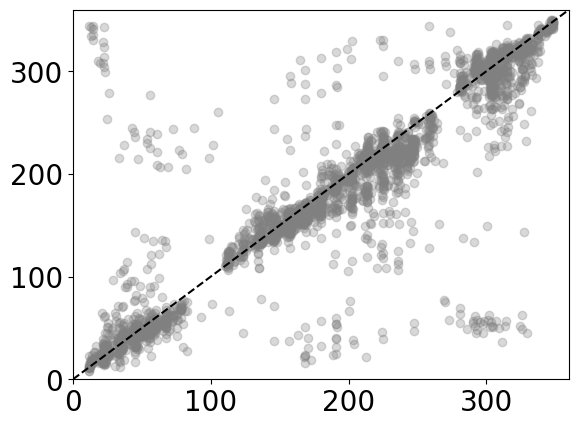

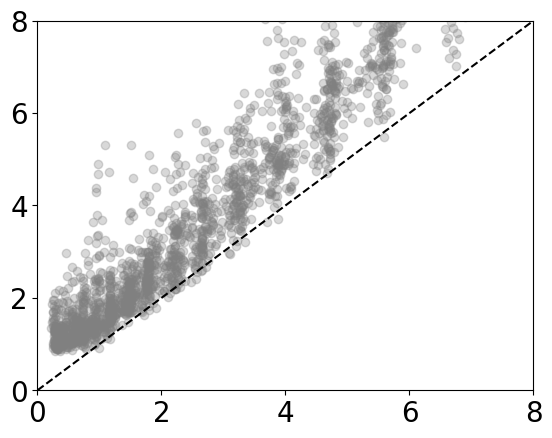

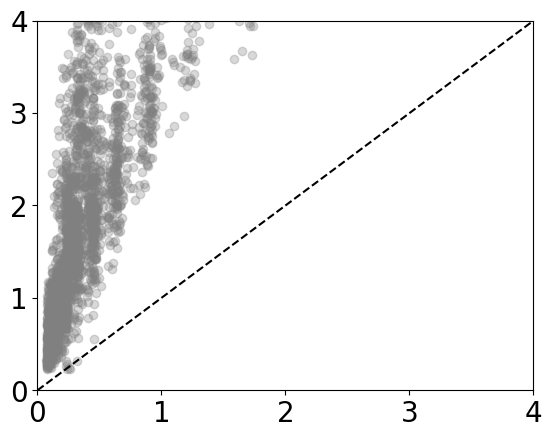

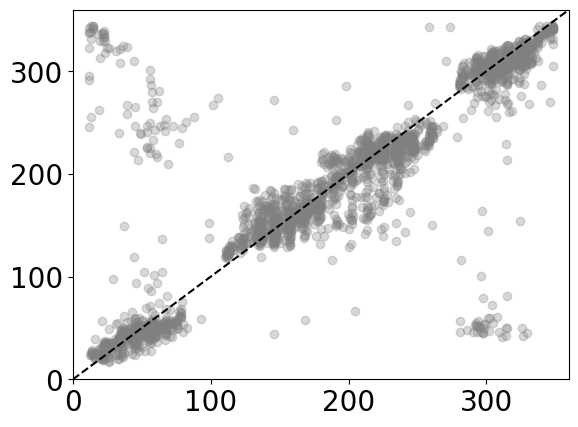

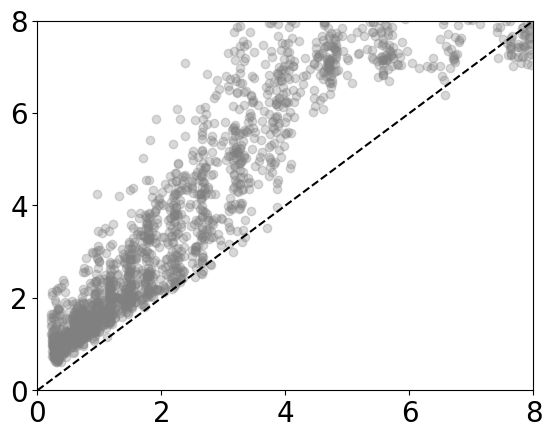

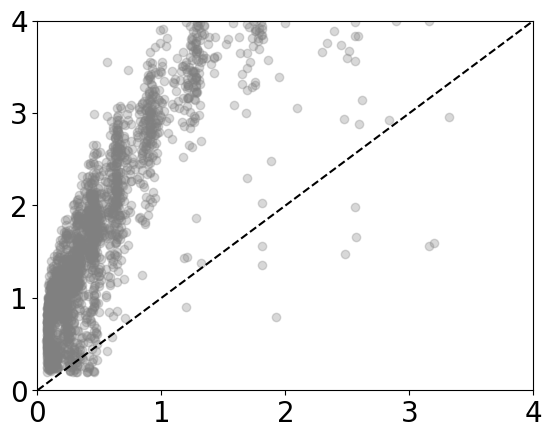

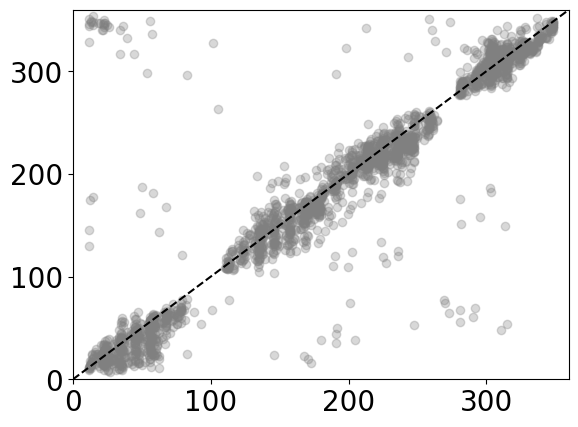

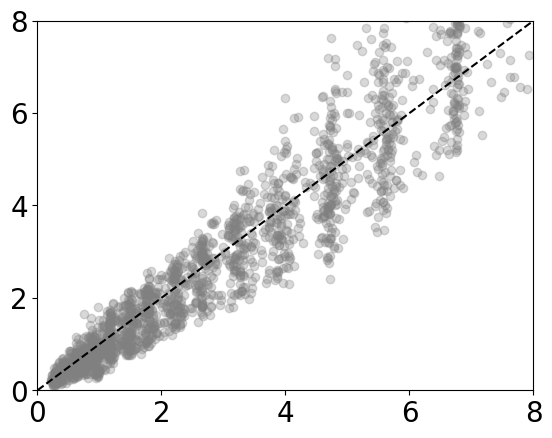

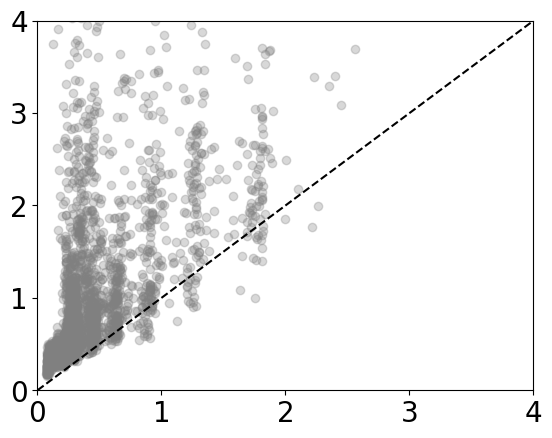

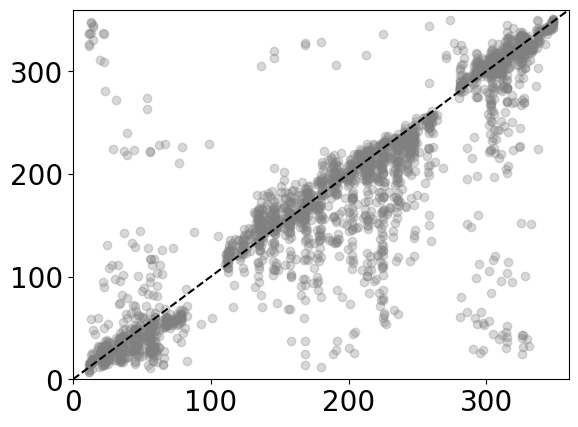

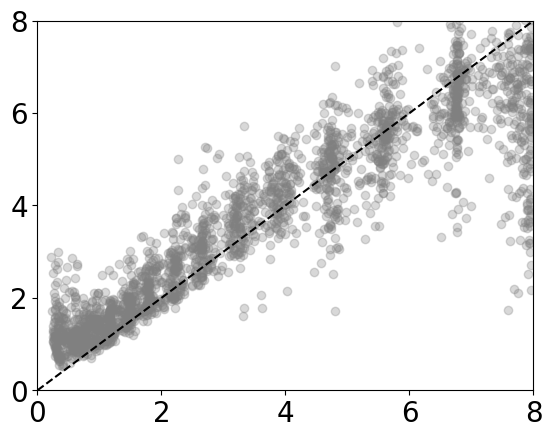

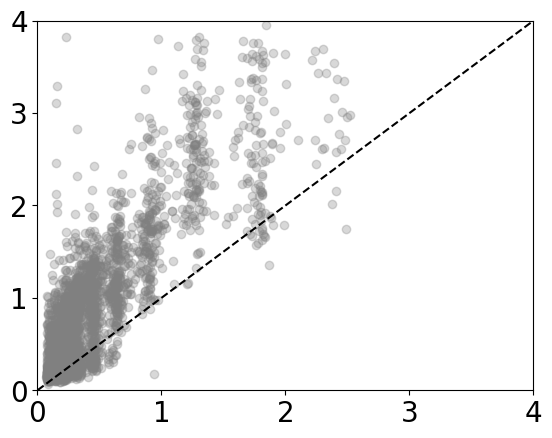

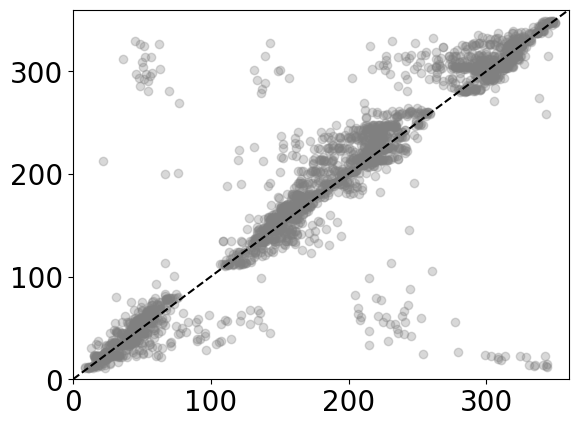

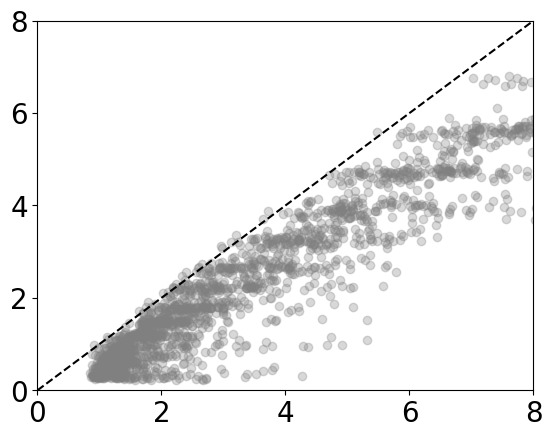

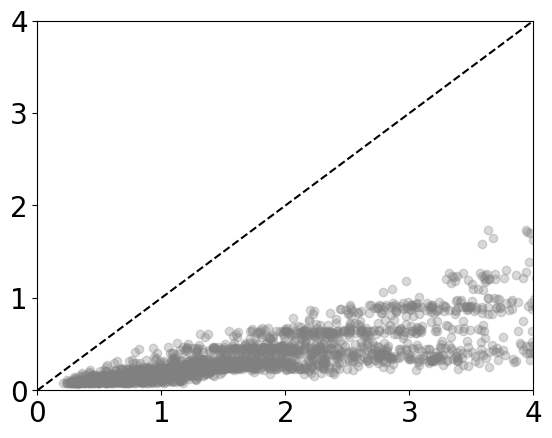

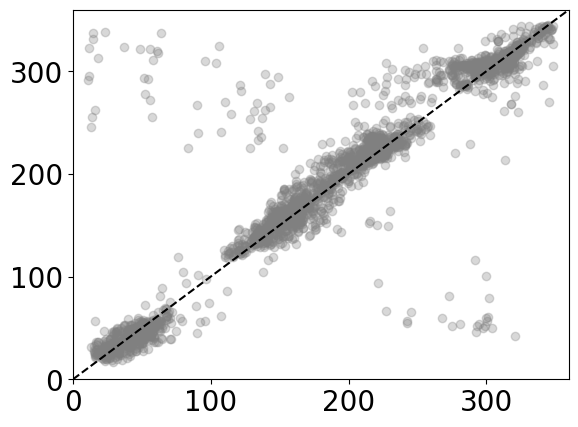

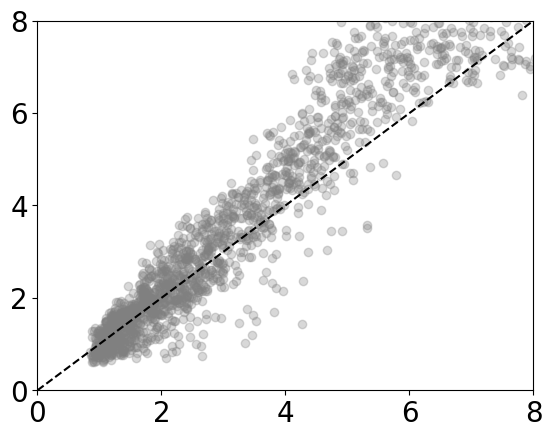

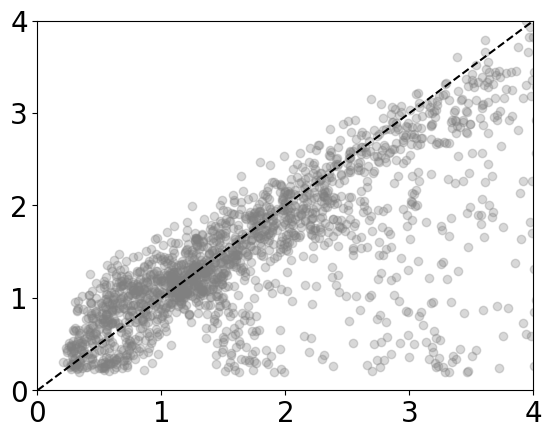

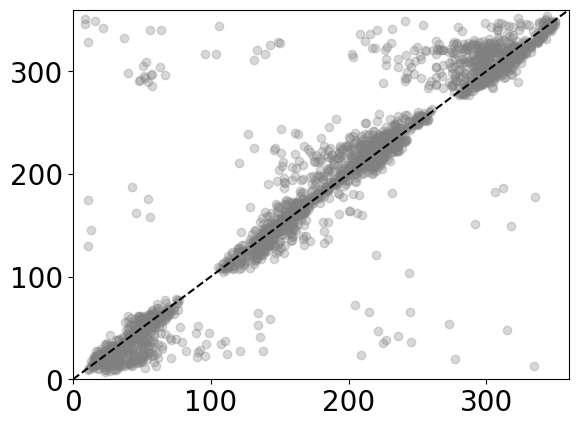

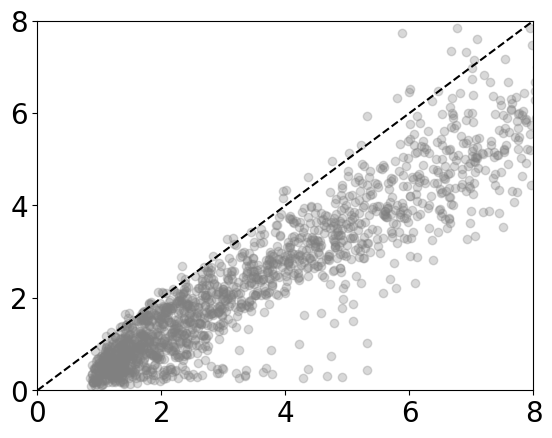

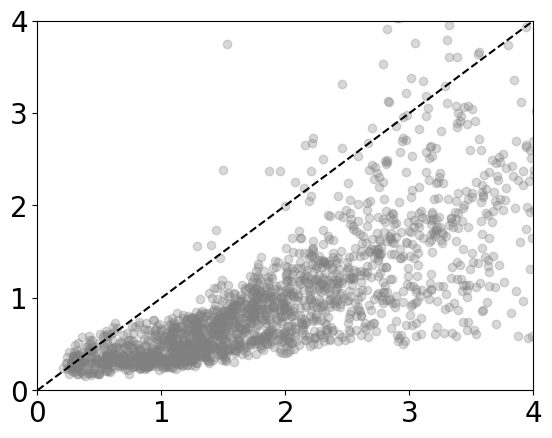

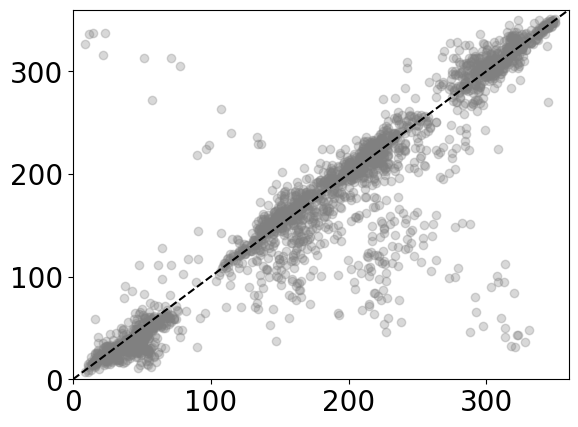

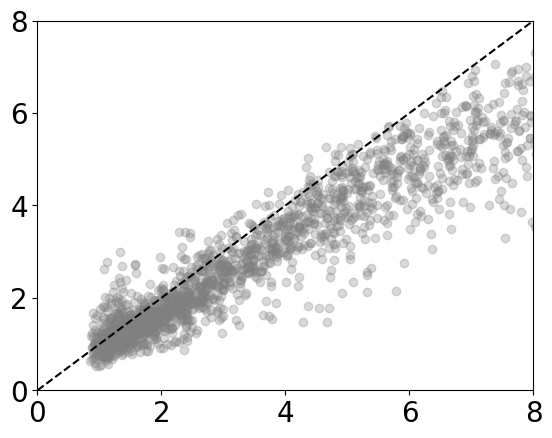

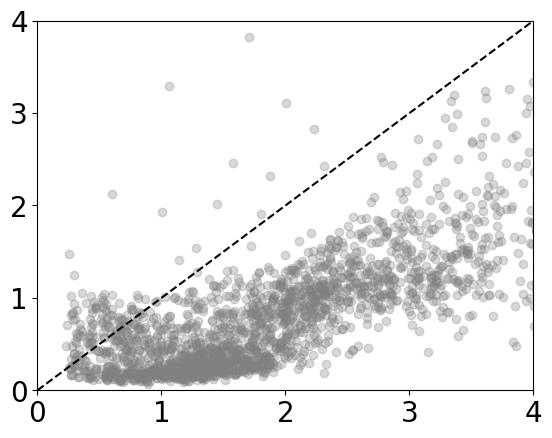

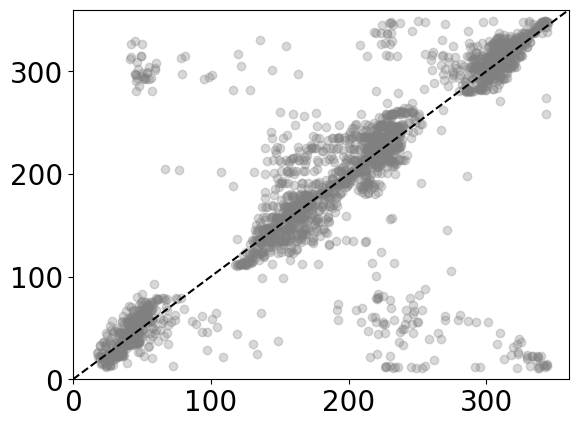

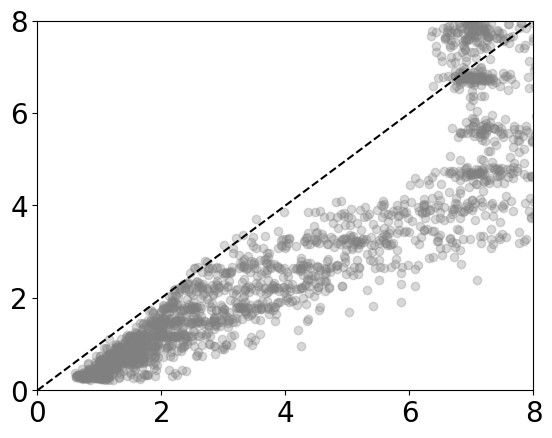

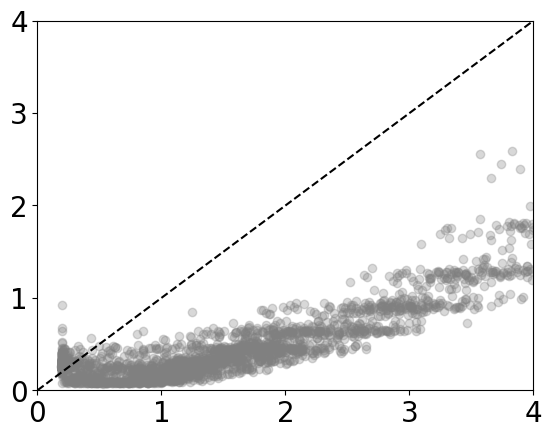

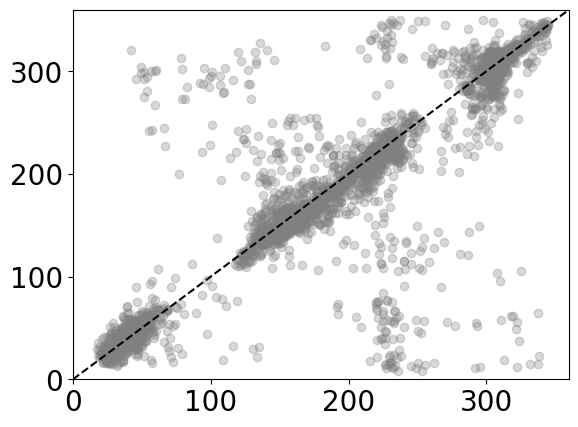

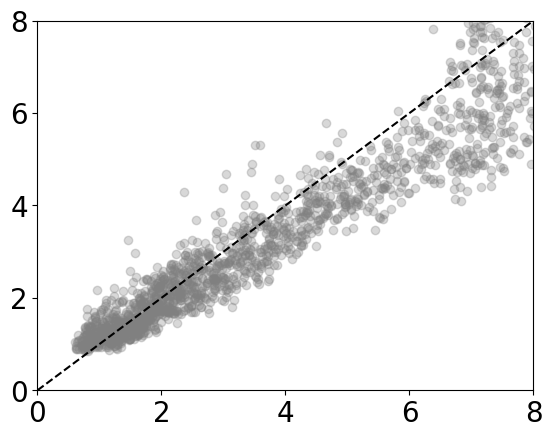

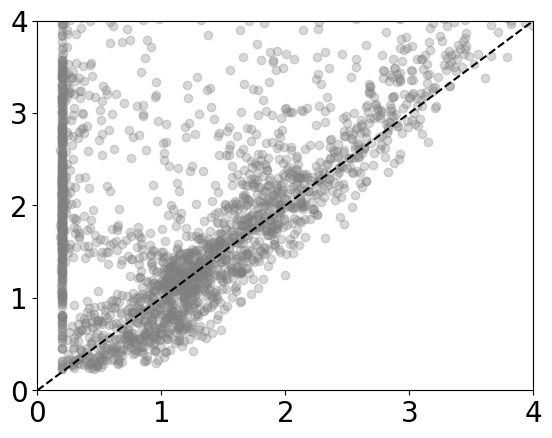

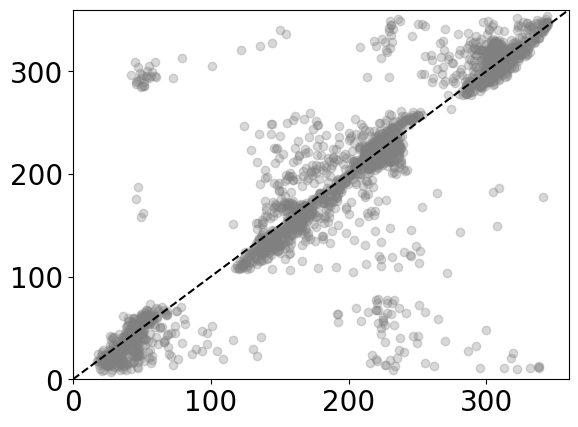

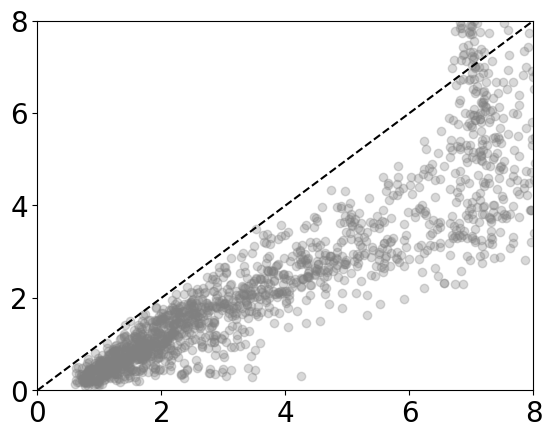

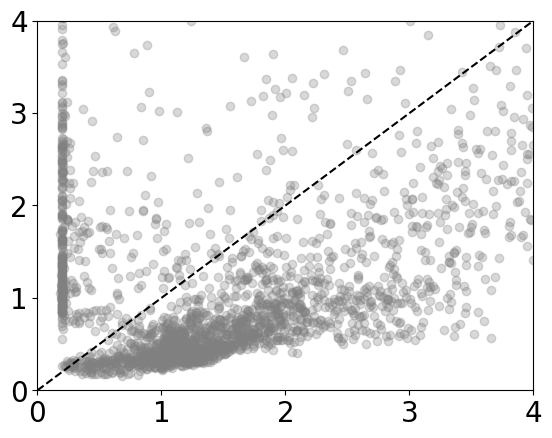

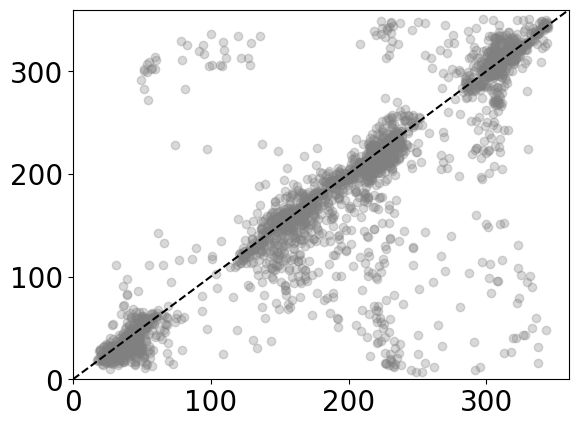

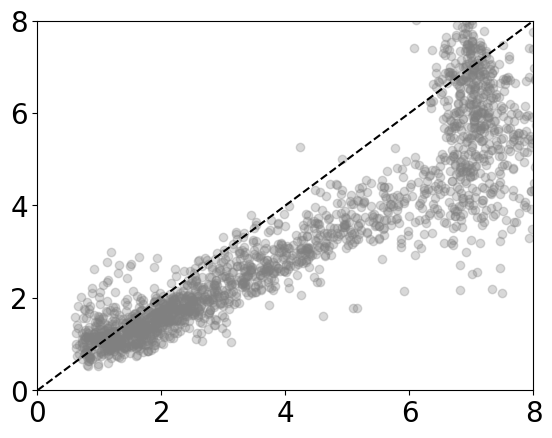

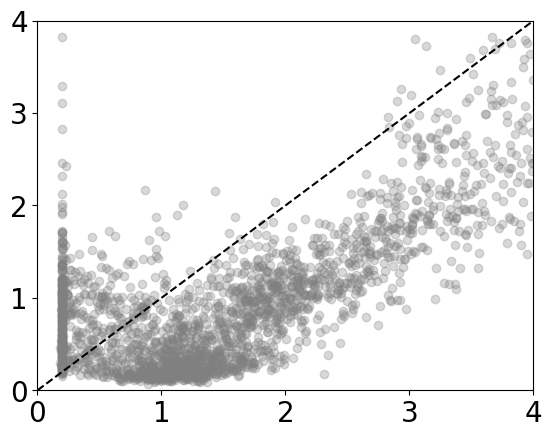

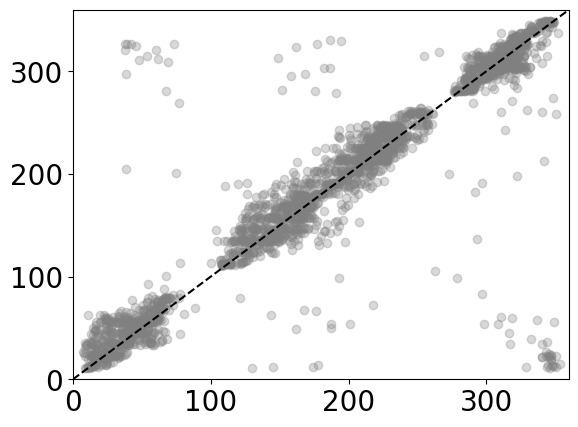

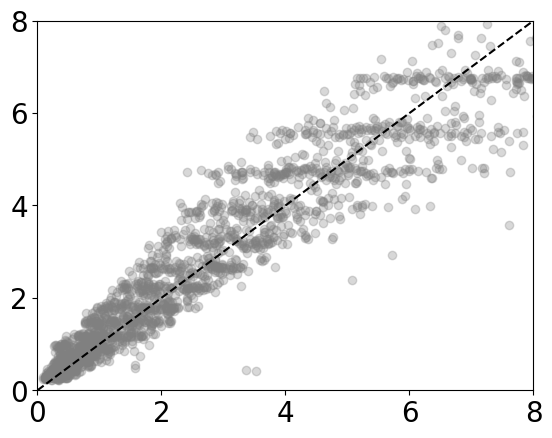

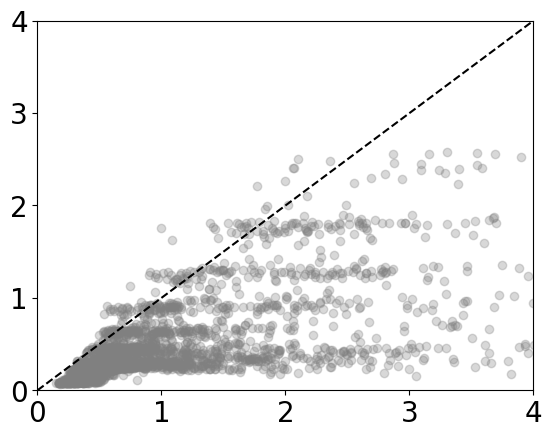

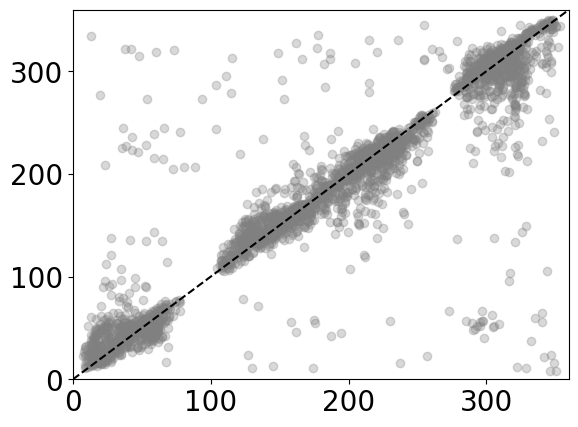

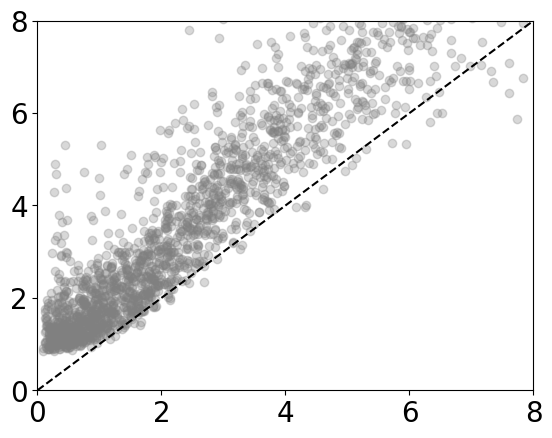

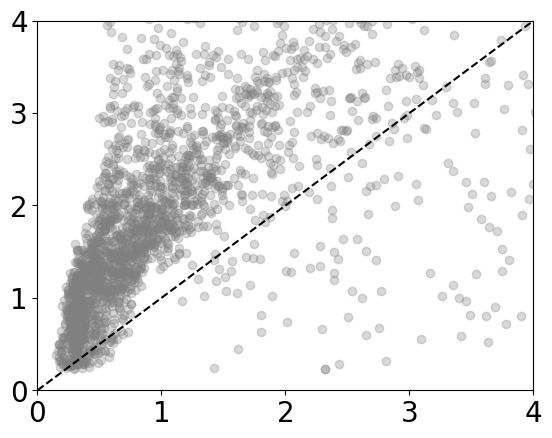

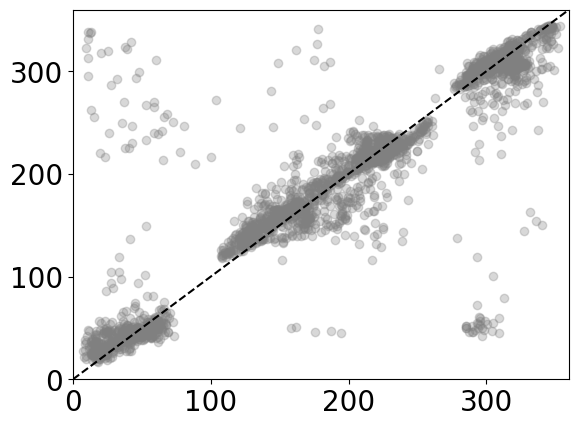

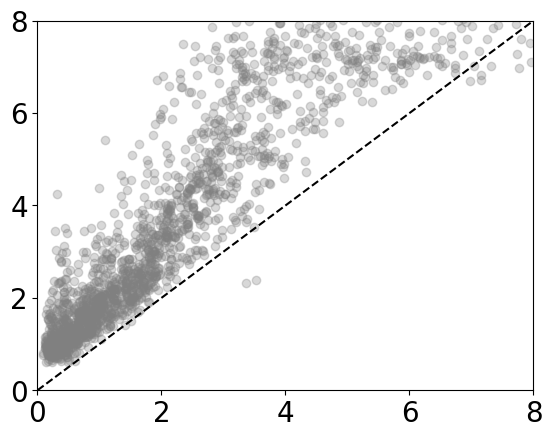

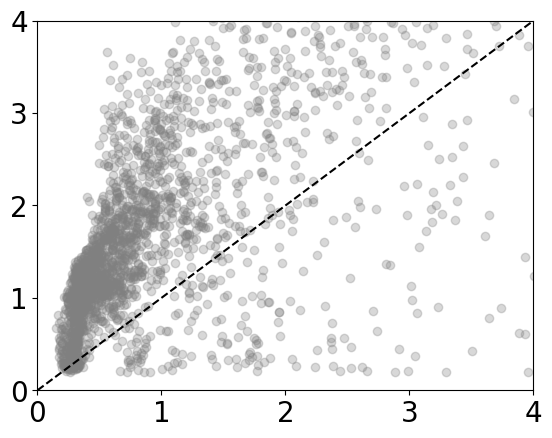

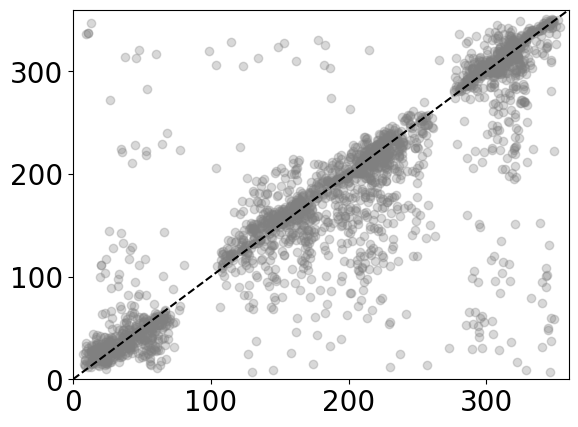

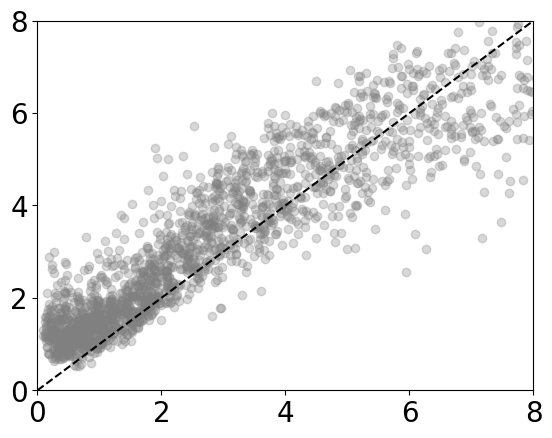

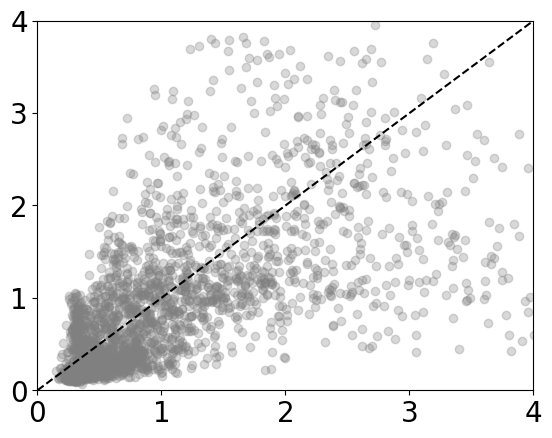

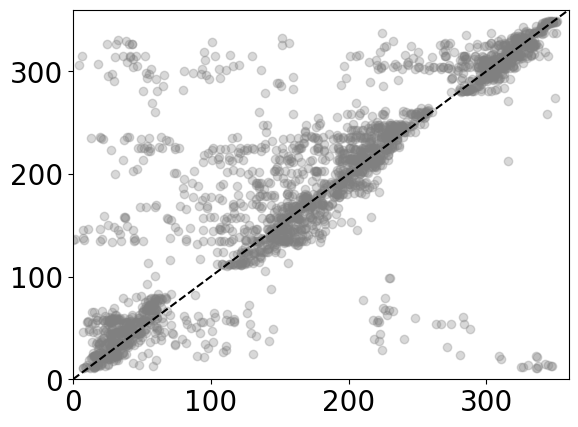

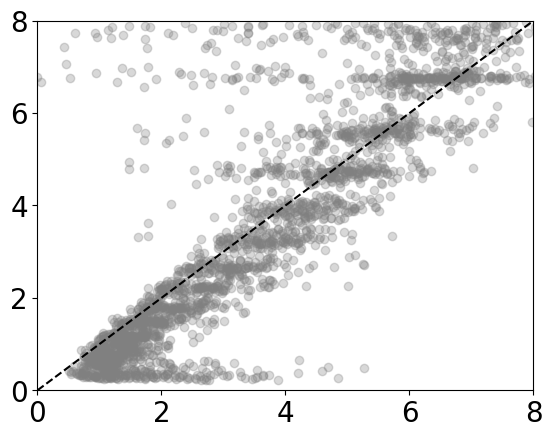

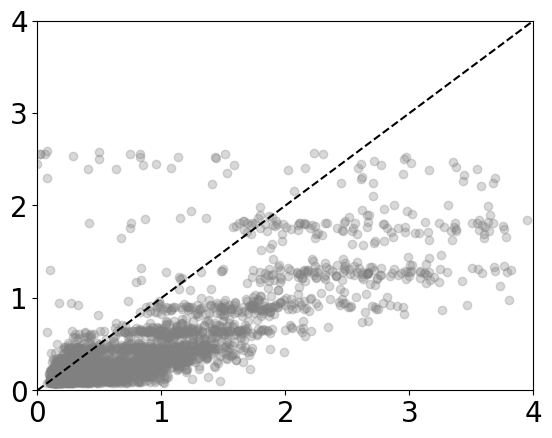

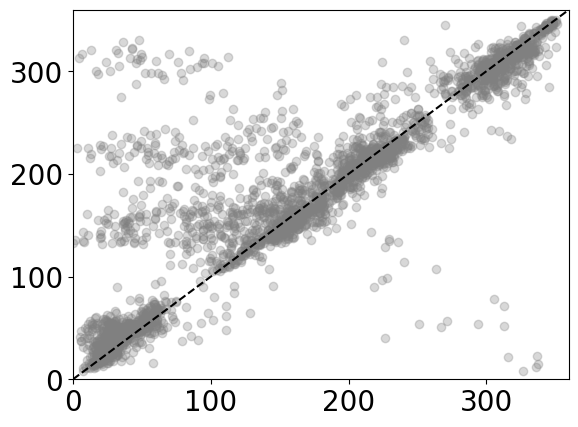

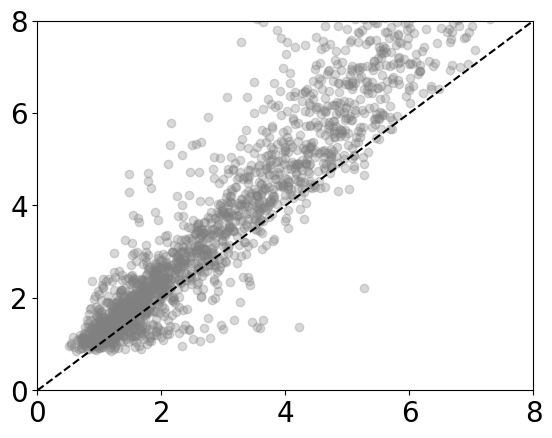

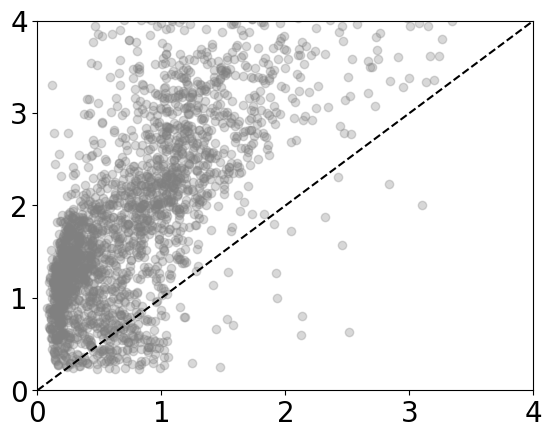

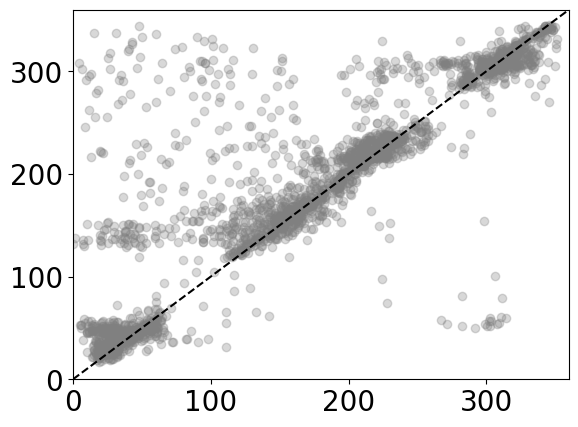

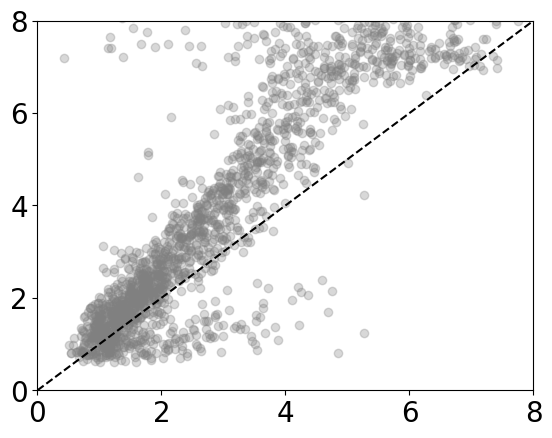

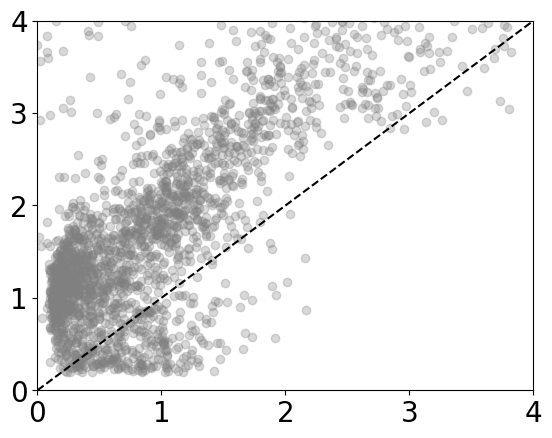

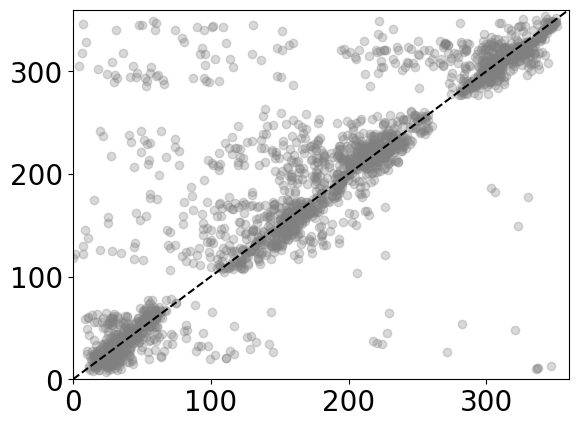

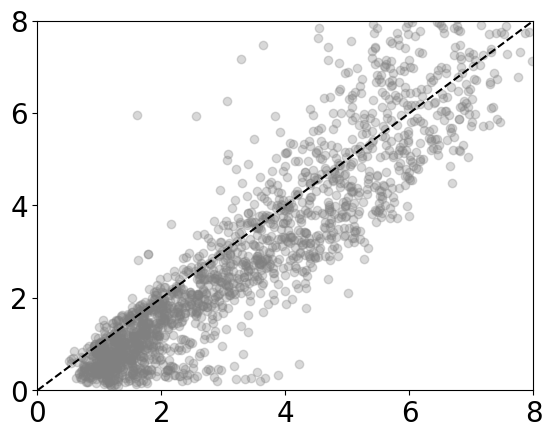

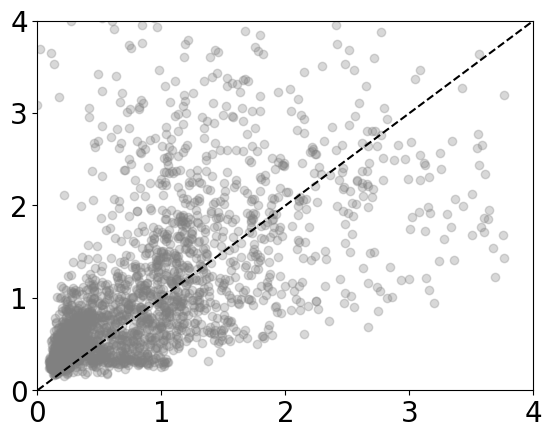

In [26]:
for dataset_name_1 in ['hcp', 'nyu', 'stanford', 'chn', 'kiwi']:
    for dataset_name_2 in ['hcp', 'nyu', 'stanford', 'chn', 'kiwi']:
        if dataset_name_1 != dataset_name_2:
            dataset_vs_dataset(dataset_name_1, dataset_name_2)